# Nonstationary Processes

* Up to now, the processes have been assumed to be stationary.


* However, most of the real time series are nonstationary.


* Often, it is useful to formulate a process into its different components, i.e.

$$
X_t=T_t+C_t+S_t+\varepsilon_t,
$$

where $T_t$, $C_t,$ $S_t$, and $\varepsilon_t$ are the **_trend_**, **_cyclical_**, **_seasonal_**, and **_irregular_** components, respectively.

* $T_t$ reflects the systematic permanent (i.e. large-run) variations of $X_t$, e.g., the potential GDP.

* $C_t$ represents the oscillations of $X_t$ around $T_t$, e.g. the expansion and contraction times of the GDP.

* $S_t$ is a seasonal pattern which repeats every certain regular time period.

* $\varepsilon_t$ reflects the non-systematic movements in $X_t$.


* For now the interest will be focused on the trend component $T_t$.


* There exist two ways to describe the trend $T_t$ of a time series $X_t$:

    * **_Deterministic trends_**: systematic variations which are completely predictable.

    * **_Stochastic trends_**: systematic variations which are hardly predictable.


* Hence, the permanent or trend component is given by

$$
T_t=DT_t+ST_t,
$$

where $DT_t$ and $ST_t$ are the deterministic and stochastic trends.

## Deterministic Trends

* The specification of a deterministic trend can be any functional form of $t$. 


* For example, it can be any of following forms:

$$
\begin{split}
DT_t &= 0,\\
DT_t &= \beta_0,\qquad\qquad\qquad\qquad\qquad\qquad\ \quad \ \text{(Drift)}\\
DT_t &= \beta_0+\beta_1 t,\qquad\qquad\qquad\qquad\qquad\quad\  \text{(Linear trend)}\\
DT_t &= \sum_{i=1}^{\varrho}\beta_i t^i,\qquad\qquad\qquad\qquad\qquad\quad\ \, \, \text{(Polynomial trend)}\\
DT_t &=
\begin{cases}
\beta_0 +\beta_1 t, &\quad t=1,\ldots,m\\
\delta_0+\delta_1 t, &\quad t=m+1,\ldots,n\qquad\ \ \,  \text{(Segmented trend)}
\end{cases}\\
DT_t&=\beta_0+\beta_1\cos(\omega t)+\beta_2\sin(\omega t),\qquad\qquad\, \text{(Sin-cosine trend)}
\end{split}
$$


* Hence,

$$
X_t = DT_t +\psi(B)\varepsilon_t,
$$

where $\psi(B)\varepsilon_t$ is a stationary stochastic component.


* Note that $\mathbb{E}(X_t)=DT_t$, which is time-varying.


* Although the mean is time-varying, it can be perfectly predicted through the estimation of the parameters in $DT_t$.


* Thus,

$$
X_t - DT_t = \psi(B)\varepsilon_t,
$$

corresponds to stationary (i.e. transitory) deviations of $X_t$ around $DT_t$.


* This method of detrending is known as **_trend-stationary_**.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     6906.
Date:                Fri, 13 Mar 2020   Prob (F-statistic):          3.59e-208
Time:                        07:30:17   Log-Likelihood:                -1080.7
No. Observations:                 300   AIC:                             2165.
Df Residuals:                     298   BIC:                             2173.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4825      1.031      3.378      0.0

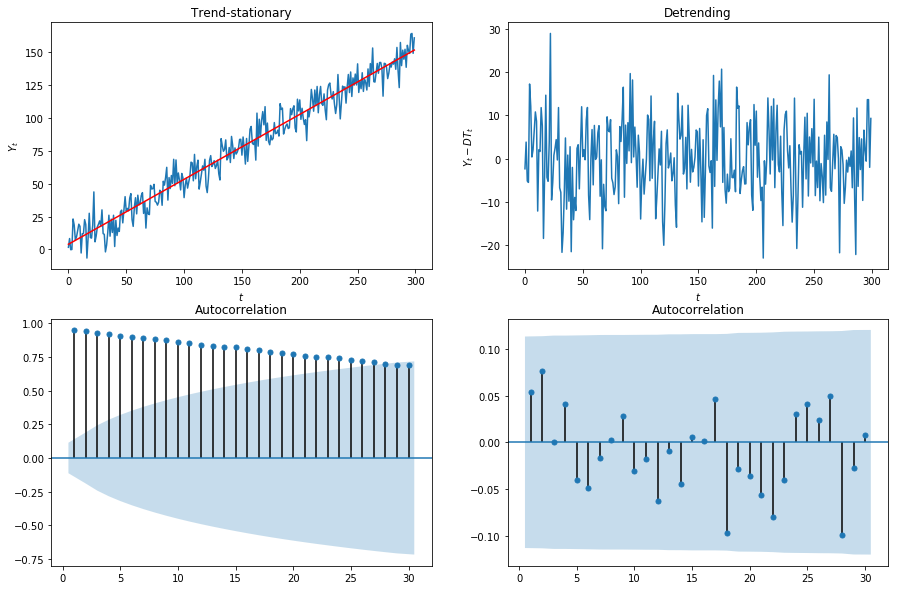

In [10]:
import numpy as np
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS, RegressionResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot

np.random.seed(12345)
k = 30                             # lags
n = 300                            # number of observations
sigma = 9                          # standard deviation
t = np.linspace(1, n, n)           # trend
X = add_constant(t) # add a constant
beta = [3, 0.5]                    # theoretical parameters 
e = np.random.normal(0, sigma, n)  # noise
y = np.dot(X, beta) + e 

# regression model
model = OLS(y, X).fit()
print(model.summary())
# fitted values
y_hat = model.fittedvalues         # also y_hat = model.predict()
# residuals
res = model.resid                  # also res = y-y_hat

fig, axs= pyplot.subplots(2, 2, figsize=(15, 10), sharey=False)
axs[0,0].plot(y)
axs[0,0].plot(y_hat, color='r')
axs[0,0].set_ylabel(r'$Y_t$')
axs[0,0].set_xlabel(r'$t$')
axs[0,0].set_title('Trend-stationary')
fig = plot_acf(y, lags=30, ax=axs[1,0], zero=False)
axs[0,1].plot(res)
axs[0,1].set_ylabel(r'$Y_t-DT_t$')
axs[0,1].set_xlabel(r'$t$')
axs[0,1].set_title('Detrending')
fig = plot_acf(res, lags=30, ax=axs[1,1], zero=False)
pyplot.show()

## Stochastic Trends

* When the systematic variations of the process $X_t$ are hardly predictable, then these correspond to _stochastic trends_.


* Let be the following two processes
$$
\begin{split}
X_{t}&= \phi_{1}X_{t-1}+\varepsilon_{t},\quad |\phi_{1}|<1\\
Y_{t}&= Y_{t-1}+\xi_{t},
\end{split}
$$
where $\left\{\varepsilon_{t}\right\}$ and $\{\xi_{t}\}$ are white noise processes.

    * The first model is an AR(1) stationary process.
    * The second model is a particular case of the former when $\phi_1=1$.
    * The last one is called a **_Random Walk_** process.
    * It is also known as an AR(1) model with a **_unit root_** since $\phi_1=1$.
    * The process is specially important in macroeconomic and finance theory.
    * Though both models are AR processes these have different properties.

Stationary AR(1)|Random Walk
 :---:| :---:
$X_{t}= \phi_1^tX_0+\sum_{j=0}^{t-1}\phi_{1}^j\varepsilon_{t-j}$|$Y_{t}= Y_0+\sum_{j=0}^{t-1}\xi_{t-j}$         
$\mathbb{E}(X_{t})= 0$|$\mathbb{E}(Y_{t})= 0$
$\mathrm{Var}(X_{t})\to\frac{\sigma_\varepsilon^2}{1-\phi_1^2}$ as $t\to\infty$|$\mathrm{Var}(Y_{t})= t\sigma_\xi^2$
$\gamma_k^X=\frac{\phi_1^k\sigma_\varepsilon^2}{1-\phi_1^2}$, $\ k>0$|$\gamma_k^Y= (t-k)\sigma_\xi^2$, $\ k>0$
$\rho_k^X=\phi_1^k$, $\quad	\ \, \, k>0$|$\rho_k^Y=(t-k)/t$, $\ \ k>0$
*Assuming initial conditions $X_0=Y_0=0$.

   * The stochastic shocks have decaying effects on $X_t$.
   * The effect of past shocks $\xi_{t-j}$ on $Y_t$ are permanent.
   * The variance of the stationary $\mathrm{AR}(1)$ process converges to a constant.
   * The autocorrelation function of $X_t$ decreases with $k$.
   * The variance and autocorrelations of the random walk are time-varying.

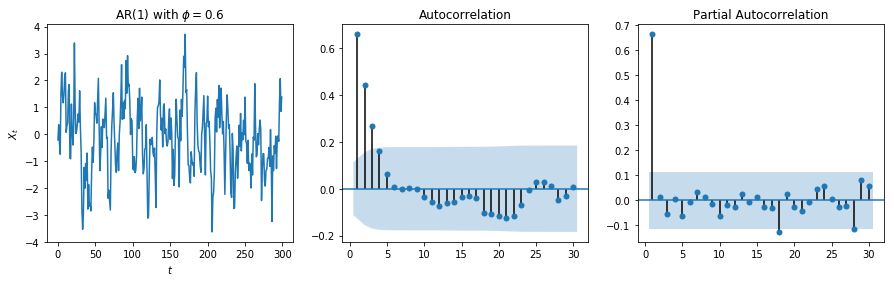

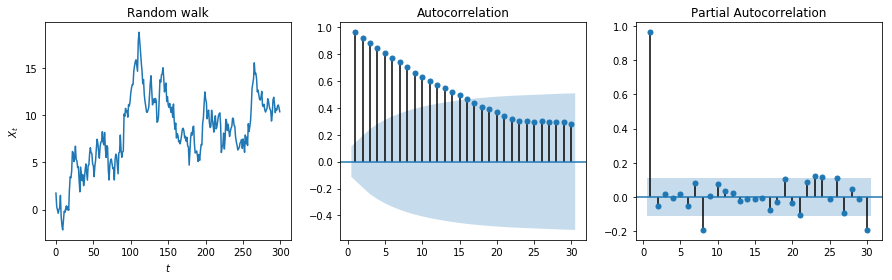

In [11]:
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot

np.random.seed(12345)
n = 300 # number of observations
k = 30 # lags
t = np.linspace(1, n, n) # time-trend

# AR(1) with phi = ar = 0.6
arparams = np.array([0.6])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
constant = 0
trend = 0
x = arma_generate_sample(ar, ma, scale=1, nsample=n) + constant + trend*t

fig, axs= pyplot.subplots(1, 3, figsize=(15, 4), sharey=False)
axs[0].plot(x)
axs[0].set_ylabel(r'$X_t$')
axs[0].set_xlabel(r'$t$')
axs[0].set_title(r'AR(1) with $\phi = 0.6$')
fig = plot_acf(x,  lags=k, ax=axs[1], zero=False)
fig = plot_pacf(x, lags=k, ax=axs[2], zero=False)
pyplot.show()

# Random Walk = AR(1) with phi = ar = 1
arparams = np.array([1])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
constant = 0
trend = 0
x = arma_generate_sample(ar, ma, scale=1, nsample=n) + constant + trend*t

fig, axs= pyplot.subplots(1, 3, figsize=(15, 4), sharey=False)
axs[0].plot(x)
axs[0].set_ylabel(r'$X_t$')
axs[0].set_xlabel(r'$t$')
axs[0].set_title('Random walk')
fig = plot_acf(x,  lags=k, ax=axs[1], zero=False)
fig = plot_pacf(x, lags=k, ax=axs[2], zero=False)
pyplot.show()

## Differentiation

* Nonstationary series must be transformed into stationarity series.


* A series with stochastic trends can be made stationary by **_differencing_**.


* The **_difference operator_**, $\Delta$, is defined as
$$
\Delta^d X_t=(1-B)^dX_t,\quad d\in\mathbb{N}_0,
$$
which is called the $d$-th difference of $X_t$.
    
    * Examples:
    $$
    \begin{split}
    \Delta^0 X_t&=X_t,\qquad\qquad\qquad\qquad\qquad\qquad \, \, \text{(Identity operator)}\\
    \Delta X_t&=(1-B)X_t=X_t - X_{t-1},\qquad\qquad\quad\, \,  \text{(First difference)}\\
    \Delta^2 X_t&=(1-B)^2X_t=X_t - 2X_{t-1} + X_{t-2},\quad\quad\text{(Second difference)}\\
    \end{split}
    $$


* In general, if $X_t$ is differenced $d$ times, i.e. $\Delta^d X_t$, to be stationary, then it is said to be **_integrated of order $d$_**, denoted as $I(d)$.


* It is also called a **_difference-stationary_** process.


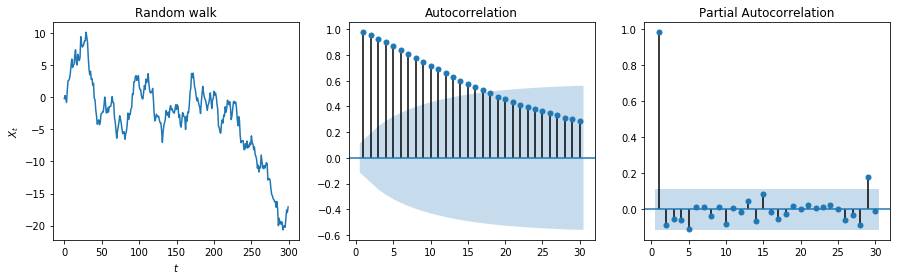

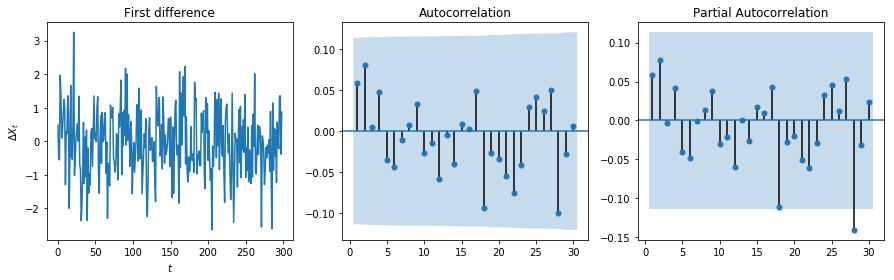

In [12]:
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.tools import diff
from matplotlib import pyplot

np.random.seed(12345)
n = 300 # number of observations
k=30 # lags
t = np.linspace(1, n, n) # time-trend

# Random Walk = AR(1) with phi = ar = 1
arparams = np.array([1])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
constant = 0
trend = 0
x = arma_generate_sample(ar, ma, scale=1, nsample=n) + constant + trend*t

fig, axs= pyplot.subplots(1, 3, figsize=(15, 4), sharey=False)
axs[0].plot(x)
axs[0].set_ylabel(r'$X_t$')
axs[0].set_xlabel(r'$t$')
axs[0].set_title('Random walk')
fig = plot_acf(x,  lags=k, ax=axs[1], zero = False)
fig = plot_pacf(x, lags=k, ax=axs[2], zero = False)
pyplot.show()

# First difference of X_t
dx = diff(x, k_diff=1, k_seasonal_diff=None, seasonal_periods=1)

fig, axs= pyplot.subplots(1, 3, figsize=(15, 4), sharey=False)
axs[0].plot(dx)
axs[0].set_ylabel(r'$\Delta X_t$')
axs[0].set_xlabel(r'$t$')
axs[0].set_title('First difference')
fig = plot_acf(dx,  lags=k, ax=axs[1], zero = False)
fig = plot_pacf(dx, lags=k, ax=axs[2], zero = False)
pyplot.show()


# Unit root testing


* The first step in time series analysis is to study if $X_t$ is stationary.


* It is, to identifying the correct order of integration of $X_t$.


* In the context of ARIMA modeling, it is to determining the parameter $d$.


* To do this, the Box-Jenkins approach suggests a visual inspection of the ACF $\hat{\rho}(k)$.


* However, this visual inspection is subjective.


* Unit root tests use formal statistical tests for this issue


## Dickey-Fuller Test

* Consider the AR(1) process,

$$
X_{t}= \phi X_{t-1}+\varepsilon_{t},\quad\varepsilon_t\overset{\mathrm{iid}}{\sim}\mathcal{N}(0,\sigma^2_\varepsilon).
$$


* A unit root test provides a way to test the hypotheses

$$
\begin{split}
H_0:&\ \phi=1\qquad (\text{i.e. there is no unit root})\\
H_1:&\ |\phi|<1\quad\ \  (\text{i.e. there is no unit root})
\end{split}
$$


* The $\mathrm{AR}(1)$ process can be equivalently written, by subtracting  $X_{t-1}$ on both sides of the equation, as

$$
\begin{split}
\Delta X_t&=(\phi-1)X_{t-1} + \varepsilon_{t}\\
&=\gamma X_{t-1} + \varepsilon_{t}.
\end{split}
$$


* Thus, testing the unit root hypotheses $\phi=1$ is equivalent to $\gamma = 0$.


* $\gamma = 0$ can be tested by estimating $\gamma$ in the OLS regression of $\Delta X_t$ on $X_{t-1}$, and forming a test,

$$
\tau_\gamma=\frac{\hat{\gamma}}{\mathrm{se}(\hat{\gamma})}.
$$


* This test leads to the so-called **Dickey-Fuller (DF)** test.


* The DF test can be extended to $\mathrm{AR}(p)$ models, and also to include deterministic trends

$$
\begin{split}
\Delta X_t&=\gamma X_{t-1} + \sum_{j=1}^{p-1}\psi_j\Delta X_{t-j}+\varepsilon_{t}\\
\Delta X_t&=\beta_0 +\gamma X_{t-1} + \sum_{j=1}^{p-1}\psi_j\Delta X_{t-j}+\varepsilon_{t}\qquad\qquad\text{(drift)}\\
\Delta X_t&=\beta_0 +\beta_1 t+ \gamma X_{t-1} + \sum_{j=1}^{p-1}\psi_j\Delta X_{t-j}+\varepsilon_{t}\quad\ \ \ \, \text{(linear trend)}
\end{split}
$$

where $\gamma =\sum_{j=1}^{p}\phi_j-1$, and $\psi_j=-\sum_{i=j}^{p}\phi_i$ for $j=2,\ldots,p$.


* This test leads to the so-called **augmented Dickey-Fuller (ADF)** test.


* This specification is needed when there is serial correlation in the errors.


* The specification of the deterministic trends in the unit root test is critical.


* $\gamma = 0$ can be tested by estimating $\gamma$ in the OLS regression of $\Delta X_t$ on $X_{t-1},\Delta X_{t-1},\ldots,\Delta X_{t-p+1}$, and building the test

$$
\tau_\gamma=\frac{\hat{\gamma}}{\mathrm{se}(\hat{\gamma})}.
$$


* Under $\gamma=0$, $\tau_\gamma$ has neither a $t$-Student nor an asymptotic Gaussian distributions. Thus, the quantiles of the distribution of $\tau_\gamma$ are obtained by simulation.


* $H_0$ is rejected if the value of $\tau_\gamma$ is less or equal to the $\alpha$-quantile $\tau_\gamma(\alpha,n)$.


* Or, $H_0$ is rejected if the p-value is less than the $\alpha$ level of significance.


* The optimal choice of the unknown lag $p$ is crucial.


* $p$ is assumed to be large enough to capture the correlation structure:

    * $p^\ast = \lfloor12(n/100)^{0.25}\rfloor$, where $\lfloor z\rfloor$ is the greatest integer $\leq z$, $z\in\mathbb{R}$
    * $p^\ast = \lfloor4(n/100)^{0.25}\rfloor$
    * $p^\ast = \lfloor(n-1)^{1/3}\rfloor$
    * Information criteria based rules (e.g. AIC, BIC,...)
    * Sequential rules


* Other unit root test:

    * Phillips-Perron (PP)
    * Kwiatkowski-Phillips-Schmidt-Shin (KPSS)
    * Schmidt and Phillips
    * Elliott, Rothenberg and Stock
    * Perron and Ng
    * Zivot and Andrews
    * Hylleberg, Engle, Granger and Yoo
    * $\vdots$

In [13]:
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot

np.random.seed(12345)
n = 300 # number of observations
k = 30 # lags
t = np.linspace(1, n, n) # time-trend

# AR(1) with phi = ar = 0.6
arparams = np.array([0.6])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
constant = 0
trend = 0
x = arma_generate_sample(ar, ma, scale=1, nsample=n) + constant + trend*t

'''
# Random Walk = AR(1) with phi = ar = 1
arparams = np.array([1])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
constant = 0
trend = 0
x = arma_generate_sample(ar, ma, scale=1, nsample=n) + constant + trend*t
'''

# DF's unit root test
adf_ur = adfuller(x, maxlag=None, regression='nc', autolag='AIC') # regression{'c','ct','ctt','nc'}

#print(adf_ur)

print('ADF Test Results:\n')
print('Test statistic: %.3f' %  adf_ur[0])
print('p-value: %.3f' %  adf_ur[1])
print('Used lags:', adf_ur[2])
print('Critical Values:')
for j, q in adf_ur[4].items():
    print('\t%s: %.3f' % (j, q))

ADF Test Results:

Test statistic: -7.694
p-value: 0.000
Used lags: 0
Critical Values:
	1%: -2.573
	5%: -1.942
	10%: -1.616


# Autoregressive Integrated Moving-Average process


* If $\Delta^d X_t$ is stationary and follows an $\mathrm{ARMA}(p,q)$ model, then $X_t$ is an **_Autoregressive Integrated Moving-Average_** process, $\mathrm{ARIMA}(p,d,q)$,

$$
\Delta^d X_{t}= \phi_{1}\Delta^d X_{t-1}+\cdots+\phi_{p}\Delta^d X_{t-p}+\varepsilon_{t}+\theta_{1}\varepsilon_{t-1}+\cdots+\theta_{q}\varepsilon_{t-q},
$$

where $d<p$, and $\left\{\epsilon_{t}\right\}$ is white noise.

* In terms of the backward operator, the $\mathrm{ARIMA}(p,d,q)$ process can be written compactly as

$$
\phi_{p}(B)(1-B)^dX_{t}=\theta_{q}(B)\varepsilon_{t},
$$

where $
\phi_{p}(z)=1-\phi_{1}z-\cdots-\phi_{p}z^{p}$ and $\theta_{q}(z)=1+\theta_{1}z+\cdots+\theta_{q}z^{q}$

## Basic steps to fitting ARIMA models:

1. Plotting the data, and inspect for patterns in the series
2. Using the ACF and unit root tests for the existence of non-stationarity
3. Transforming the data to achieve stationarity if it is needed
4. Identifying tentative dependence orders $p$ and $q$ of the model
5. Estimating the model's parameters
6. Diagnostic checking and validation, and
7. Forecasting future values of the series

In [14]:
import numpy  as np

# from https://github.com/TOMILO87/time_series_simulation
def ARIMA(phi = np.array([0]), theta = np.array([0]), d = 0, t = 0, mu = 0, sigma = 1, n = 20, burn = 10):
    """ Simulate data from ARMA model (eq. 1.2.4):

    z_t = phi_1*z_{t-1} + ... + phi_p*z_{t-p} + a_t + theta_1*a_{t-1} + ... + theta_q*a_{t-q}

    with d unit roots for ARIMA model.

    Arguments:
    phi -- array of shape (p,) or (p, 1) containing phi_1, phi2, ... for AR model
    theta -- array of shape (q) or (q, 1) containing theta_1, theta_2, ... for MA model
    d -- number of unit roots for non-stationary time series
    t -- value deterministic linear trend
    mu -- mean value for normal distribution error term
    sigma -- standard deviation for normal distribution error term
    n -- length time series
    burn -- number of discarded values because series beginns without lagged terms

    Return:
    x -- simulated ARMA process of shape (n, 1)

    Reference:
    Time Series Analysis by Box et al.
    """

    # add "theta_0" = 1 to theta
    theta = np.append(1, theta)
    
    # set max lag length AR model
    p = phi.shape[0]

    # set max lag length MA model
    q = theta.shape[0]

    # simulate n + q error terms
    a = np.random.normal(mu, sigma, (n + max(p, q) + burn, 1))
    
    # create array for returned values
    x = np.zeros((n + max(p, q) + burn, 1))

    # initialize first time series value
    x[0] = a[0]

    for i in range(1, x.shape[0]):
        AR = np.dot(phi[0 : min(i, p)], np.flip(x[i - min(i, p) : i], 0))
        MA = np.dot(theta[0 : min(i + 1, q)], np.flip(a[i - min(i, q - 1) : i + 1], 0))
        x[i] = AR + MA + t

    # add unit roots
    if d != 0:
        ARMA = x[-n: ]
        m = ARMA.shape[0]
        z = np.zeros((m + 1, 1)) # create temp array

        for i in range(d):
            for j in range(m):
                z[j + 1] = ARMA[j] + z[j] 
            ARMA = z[1: ]
        x[-n: ] = z[1: ]
        
    return x[-n: ]

# Simulated ARMA(1,1) process
np.random.seed(12345)
n = 300
t = np.linspace(1, n, n) # time-trend
t.shape = (n, 1)

arparams = np.array([.9])
maparams = np.array([.5])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
constant = 0
trend = 0
x = ARIMA(phi = arparams, theta = maparams, d = 1, t = 0, mu = 0, sigma = 1, n = n) + constant + trend*t

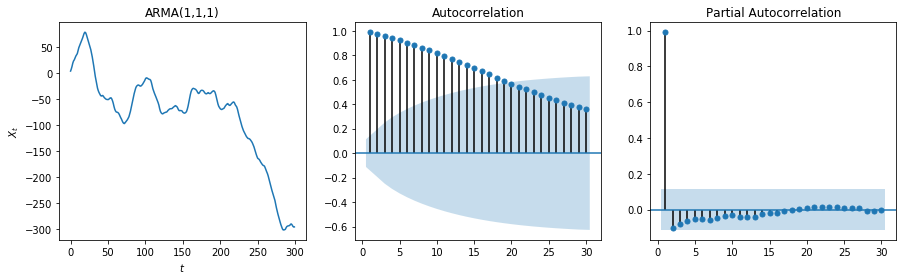

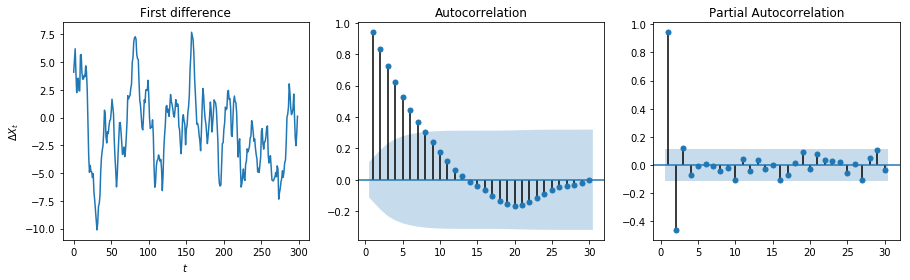

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot

k = 30 # lags

fig, axs= pyplot.subplots(1, 3, figsize=(15, 4), sharey=False)
axs[0].plot(x)
axs[0].set_ylabel(r'$X_t$')
axs[0].set_xlabel(r'$t$')
axs[0].set_title('ARMA(1,1,1)')
fig = plot_acf(x,  lags=k, ax=axs[1], zero=False)
fig = plot_pacf(x, lags=k, ax=axs[2], zero=False)
pyplot.show()


# First difference of X_t
dx = diff(x, k_diff=1, k_seasonal_diff=None, seasonal_periods=1)

fig, axs= pyplot.subplots(1, 3, figsize=(15, 4), sharey=False)
axs[0].plot(dx)
axs[0].set_ylabel(r'$\Delta X_t$')
axs[0].set_xlabel(r'$t$')
axs[0].set_title('First difference')
fig = plot_acf(dx,  lags=k, ax=axs[1], zero = False)
fig = plot_pacf(dx, lags=k, ax=axs[2], zero = False)
pyplot.show()


# Estimation and Diagnostic of ARIMA models

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  299
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -425.527
Method:                       css-mle   S.D. of innovations              1.000
Date:                Fri, 13 Mar 2020   AIC                            857.054
Time:                        07:34:29   BIC                            868.156
Sample:                             1   HQIC                           861.498
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      0.9102      0.024     37.844      0.000       0.863       0.957
ma.L1.D.y      0.4975      0.047     10.487      0.000       0.405       0.590
                                    Roots           

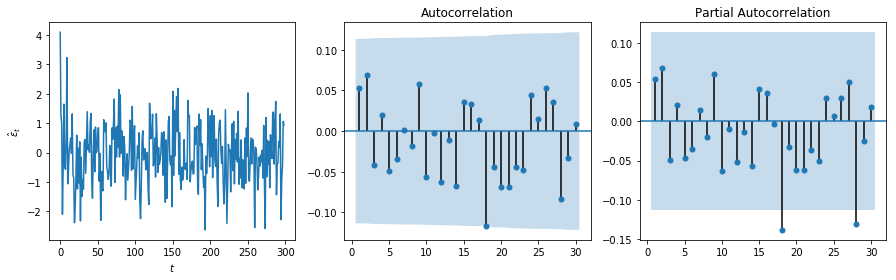

Test of No Serial Correlation
       lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.854840   0.355187   0.846320   0.357595
2    2.315953   0.314121   2.288016   0.318540
3    2.840745   0.416836   2.804091   0.422827
4    2.961369   0.564311   2.922310   0.570910
5    3.715930   0.590995   3.659323   0.599429
6    4.070446   0.667144   4.004417   0.676079
7    4.071077   0.771555   4.005029   0.779198
8    4.175319   0.840969   4.105808   0.847453
9    5.195451   0.816948   5.088659   0.826512
10   6.182515   0.799703   6.036372   0.812198
11   6.185087   0.860733   6.038833   0.870761
12   7.412777   0.829175   7.209421   0.843469
13   7.451114   0.877433   7.245848   0.889041
14   8.905530   0.837054   8.622953   0.854420
15   9.321028   0.860143   9.014984   0.876733
16   9.675914   0.882996   9.348648   0.898364
17   9.734612   0.914369   9.403640   0.926742
18  14.108646   0.721982  13.487041   0.761866
19  14.719783   0.740233  14.055540   0.780444
20  16.229605   0.702282  15.

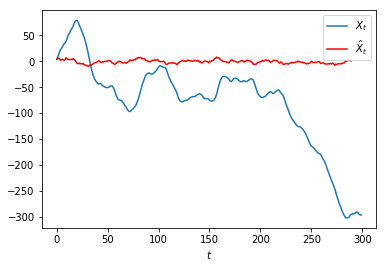

In [20]:
import numpy as np
from statsmodels.tsa.arima_model   import ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic  import acorr_ljungbox

from matplotlib import pyplot

model = ARIMA(x, order=(1,1,1)).fit(trend = 'nc')    # trend = {'c','nc'}
print(model.summary())
print('AIC: %.3f' % model.aic, '\nBIC: %.3f' % model.bic, '\nHQIC: %.3f' % model.hqic, '\nlogL: %.3f' % model.llf)
print('AR parameters: %.3f' % model.arparams,'\nMA parameters: %.3f' % model.maparams)

'''
# also
model = ARIMA(dx, order=(1,0,1)).fit(trend = 'nc')    # trend = {'c','nc'}
print(model.summary())
print('AIC: %.3f' % model.aic, '\nBIC: %.3f' % model.bic, '\nHQIC: %.3f' % model.hqic, '\nlogL: %.3f' % model.llf)
print('AR parameters: %.3f' % model.arparams,'\nMA parameters: %.3f' % model.maparams)
'''

# Diagnostics

res = model.resid

fig, axs= pyplot.subplots(1, 3, figsize=(15, 4), sharey=False)
axs[0].plot(res)
axs[0].set_ylabel(r'$\hat{\varepsilon}_t$')
axs[0].set_xlabel(r'$t$')
fig = plot_acf(res,  lags=k, ax=axs[1], zero=False)
fig = plot_pacf(res, lags=k, ax=axs[2], zero=False)
pyplot.show()

# Ljung-Box and Box-Pierce Q Statistics
print('Test of No Serial Correlation\n',acorr_ljungbox(res, lags=k, boxpierce=True, return_df=True))

x_f = model.predict(start=1, end=n, typ='levels') # typ={'levels', 'linear'}

pyplot.plot(x, label=r'$X_t$')
pyplot.plot(x_f, label=r'$\hat{X}_t$', color='r')
pyplot.xlabel(r'$t$')
pyplot.legend(loc='upper right')
pyplot.show()


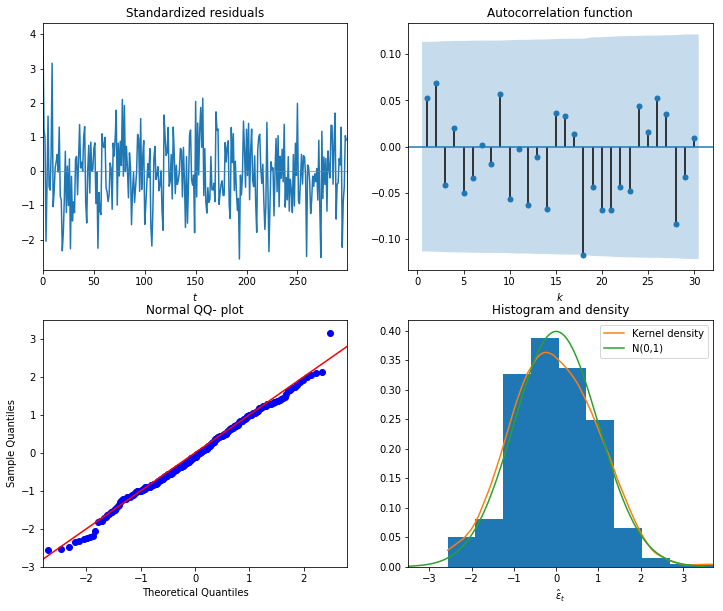

In [18]:
from sklearn.neighbors import KernelDensity
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

#Standardized
res = res/np.std(res)

fig, axs= pyplot.subplots(2, 2, figsize=(12, 10), sharey=False)
axs[0,0].plot(res)
axs[0,0].axhline(0, linestyle='-', color='gray',  linewidth=0.7)
axs[0,0].set_xlim(0,len(res))
#axs[0,0].set_ylabel(r'$\hat{\varepsilon}_t$')
axs[0,0].set_xlabel(r'$t$')
axs[0,0].set_title('Standardized residuals')

# ACF
fig = plot_acf(res,  lags=k, ax=axs[0,1], zero=False)
axs[0,1].set_xlabel(r'$k$')
axs[0,1].set_title('Autocorrelation function')

# Q-Q Plot
fig =  qqplot(res, line ='45', ax=axs[1,0])
axs[1,0].set_ylim(-3,3.5)
axs[1,0].set_xlim(-2.8,2.8)
axs[1,0].set_title('Normal QQ- plot')

# Histogram and density
res = res.reshape(res.shape[0],1)
res_d = np.linspace(res.min(), res.max(), 1000)[:, np.newaxis] # generate N points between the min() and max() of x
f_hat = KernelDensity(kernel='epanechnikov').fit(res) # fit the kernel density estimation on x
log_dens = f_hat.score_samples(res_d) # score_samples returns the log of the estimated probability density
axs[1,1].hist(res, density=True)                                                       # histogram
axs[1,1].plot(res_d, np.exp(log_dens), label = 'Kernel density')                       # kernel density
axs[1,1].plot(np.arange(-3.5, 3.5, 0.001), stats.norm.pdf(np.arange(-3.5, 3.5, 0.001), 0, 1),  label = 'N(0,1)') # N(0,1)
axs[1,1].set_xlim(-3.5,3.7)
axs[1,1].set_xlabel(r'$\hat{\varepsilon}_t$')
axs[1,1].legend(loc='upper right')
axs[1,1].set_title('Histogram and density')
pyplot.show()

In [16]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

r,q,p = sm.tsa.acf(res, fft=True, qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', 'AC', 'Q', 'Prob(>Q)'])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0   0.053202   0.854840  0.355187
2.0   0.069439   2.315953  0.314121
3.0  -0.041545   2.840745  0.416836
4.0   0.019884   2.961369  0.564311
5.0  -0.049648   3.715930  0.590995
6.0  -0.033973   4.070446  0.667144
7.0   0.001431   4.071077  0.771555
8.0  -0.018359   4.175319  0.840969
9.0   0.057333   5.195451  0.816948
10.0 -0.056299   6.182515  0.799703
11.0 -0.002869   6.185087  0.860733
12.0 -0.062570   7.412777  0.829175
13.0 -0.011038   7.451114  0.877433
14.0 -0.067865   8.905530  0.837054
15.0  0.036210   9.321028  0.860143
16.0  0.033406   9.675914  0.882996
17.0  0.013562   9.734612  0.914369
18.0 -0.116863  14.108646  0.721982
19.0 -0.043604  14.719783  0.740233
20.0 -0.068414  16.229605  0.702282
21.0 -0.068320  17.740694  0.665350
22.0 -0.043986  18.369324  0.683880
23.0 -0.047474  19.104245  0.695158
24.0  0.044098  19.740664  0.711424
25.0  0.015376  19.818321  0.756289
26.0  0.053183  20.750763  0

/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.fft(a, n, axis)


# Forecasting

Expected = -294.343690, Forecasted = -293.945262
Expected = -294.071199, Forecasted = -293.720977
Expected = -293.618804, Forecasted = -293.996564
Expected = -292.832623, Forecasted = -293.018313
Expected = -290.707265, Forecasted = -292.022717
Expected = -290.397382, Forecasted = -288.113126
Expected = -292.165760, Forecasted = -291.228485
Expected = -294.693754, Forecasted = -294.233442
Expected = -296.161246, Forecasted = -297.226364
Expected = -296.034448, Forecasted = -296.972697
MSE: 1.051, RMSE: 1.025


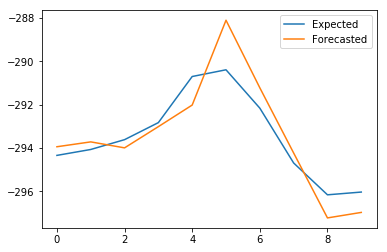

In [19]:
import numpy as np
from statsmodels.tsa.arima_model   import ARIMA, ARIMAResults
from sklearn.metrics import mean_squared_error

h = 10         # h-step ahead horizont
n = len(x) - h # number of train observations
train, test = x[0:n], x[n:len(x)]

history = [x for x in train]
forecasts = list()
#ci = list()
for t in range(h):
    model = ARIMA(history, order=(1,1,1)).fit(trend = 'nc') # training
    output = model.forecast()
    x_f = output[0]  # forecasts
    ci_f = output[2] # forecast confidence interval
    forecasts.append(x_f)
#    ci.append(ci_f)
    obs = test[t]
    history.append(obs)
    print('Expected = %f, Forecasted = %f'  % (obs, x_f))

print('MSE: %.3f, RMSE: %.3f' % (mean_squared_error(test, forecasts), np.sqrt(mean_squared_error(test, forecasts))))

pyplot.plot(test, label='Expected')
pyplot.plot(forecasts, label='Forecasted')
pyplot.legend()
pyplot.show()